In [70]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

### Get data (already processed in other nb)

In [71]:
#create list of dir paths
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb'
    
path_file_names = os.listdir(path)

data_paths = []

for file in path_file_names:
    int_path = path + '/' + file
    data_paths.append(int_path)
    
data_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb/data_comb_final_3m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb/data_RFID_final_1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb/data_VDM_tidy_intake_1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb/data_VDM_tidy_intake_3m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb/data_RFID_final_3m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/data_comb/data_comb_final_1m.csv']

#### Combin 1m and 3m data

In [169]:
data_1m = pd.read_csv(data_paths[1])
data_1m = pd.DataFrame(data = data_1m)
data_1m['TP'] = '1m'
print(data_1m.shape)

data_3m = pd.read_csv(data_paths[4])
data_3m = pd.DataFrame(data = data_3m)
data_3m['TP'] = '3m'
print(data_3m.shape)

data_comb_final = pd.concat([data_1m, data_3m], axis=0)
print(data_comb_final.shape)

#data_comb_final = data_comb_final[['Round', 'Cage', 'Animal', 'Injury', 'IdRFID',]]

data_comb_final.tail()

(67710, 27)
(94465, 27)
(162175, 27)


,Unnamed: 0,Round,Cage,Animal,Injury,IdRFID,weight_pre,unitLabel,unitLabel_drink,eventDuration,RFID_datetime_start,RFID_datetime_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,RFID_time_start,RFID_time_end,RFID_date,RFID_day,ld_seg,RFID_hour,RFID_min,RFID_day_count,RFID_hour_count,RFID_min_count,TP
94460,94460,2,1,1019,blast,041A555B76,37.4,RFID4,RFID_H20,0.075,2020-12-07 07:00:51.067958400,2020-12-07 07:00:51.142958400,2020-12-07 07:03:27.883958399,041A55553F,diff,156.740999,07:00:51,07:00:51,2020-12-07,7,light,7,0,11,247,14760,3m
94461,94461,2,1,1020,blast,041A55553F,30.8,RFID4,RFID_H20,0.224,2020-12-07 07:03:27.883958399,2020-12-07 07:03:28.107958399,NaN,NaN,diff,NaN,07:03:27,07:03:28,2020-12-07,7,light,7,3,11,247,14763,3m
94462,94462,2,2,1008,sham,041A5554AF,36.7,RFID8,RFID_H20,30.537,2020-12-07 07:34:57.773020800,2020-12-07 07:35:28.310020800,2020-12-07 07:45:52.281014400,041A555C80,diff,623.970993,07:34:57,07:35:28,2020-12-07,7,light,7,34,11,247,14794,3m
94463,94463,2,2,1007,sham,041A555C80,43.2,RFID8,RFID_H20,5.021,2020-12-07 07:45:52.281014400,2020-12-07 07:45:57.302014400,2020-12-07 07:52:24.335961600,041A555C80,same,387.033947,07:45:52,07:45:57,2020-12-07,7,light,7,45,11,247,14805,3m
94464,94464,2,2,1007,sham,041A555C80,43.2,RFID8,RFID_H20,82.699,2020-12-07 07:52:24.335961600,2020-12-07 07:53:47.034961600,NaN,NaN,diff,NaN,07:52:24,07:53:47,2020-12-07,7,light,7,52,11,247,14812,3m


blast


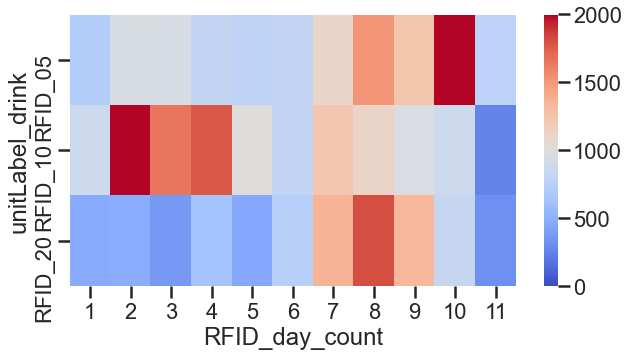

sham


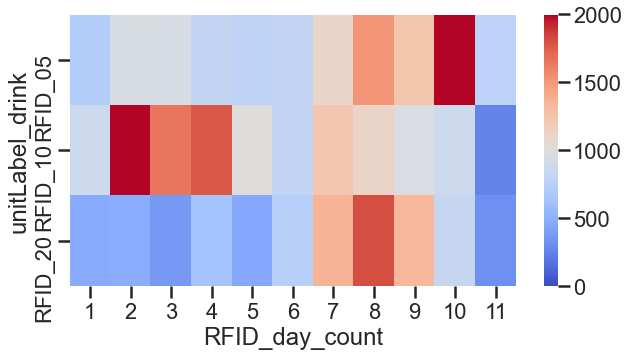

In [192]:
data_int = data_comb_final[data_comb_final['TP'] == '3m']
data_int = data_int[data_int['unitLabel_drink'] != 'RFID_H20']
data_int = data_int[data_int['Round'] == 2]

for variable in data_int['Injury'].unique():
    print(variable)
    #select variable
    #data = data_int[(data_int['Injury'] == variable)]
    #compute intake count by cage and hour
    groupby = data_int.groupby(['unitLabel_drink', 'RFID_day_count'])['eventDuration'].count().reset_index()
    #viz
    groupby = groupby.pivot("unitLabel_drink", "RFID_day_count", "eventDuration")
    plt.figure(figsize=(10,5))
    ax = sns.heatmap(groupby, cmap="coolwarm", vmin=0, vmax=2000)
    plt.show()

In [112]:
data_comb_final['IdRFID'].unique()

array(['041A555D59', '041A555768', '041A555BCC', '041A555A78',
       '041A55594C', '041A555DFF', '041A555996', '041A555B76',
       '041A55553F', '041A555C80', '041A5554AF', '041A55564D'],
      dtype=object)

### Viz

dark


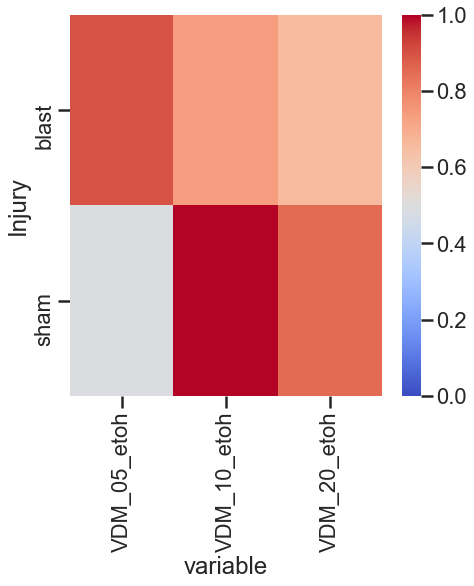

light


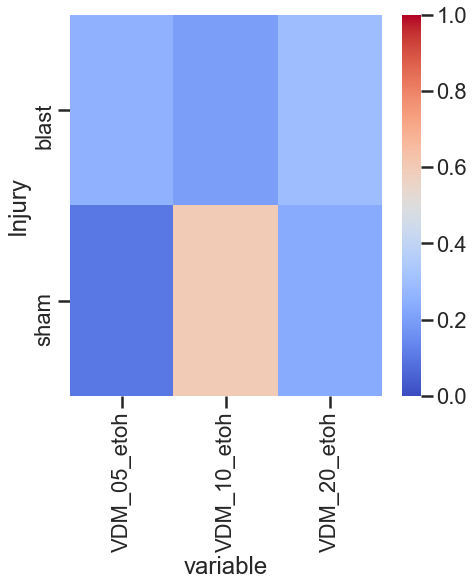

In [155]:
data_int = data_comb_final[(data_comb_final['VDM_RFID_timediff'] < 3) | (data_comb_final['VDM_RFID_timediff'].isna())]
data_int = data_int[data_int['variable'] != 'VDM_H20']
data_int = data_int[data_int['TP'] == '1m']
data_int = data_int[data_int['VDM_day_count'] < 6]

for variable in data_int['ld_seg'].unique():
    print(variable)
    #select variable
    data = data_int[(data_int['ld_seg'] == variable)]
    #compute intake count by cage and hour
    groupby = data.groupby(['Injury', 'variable'])['value'].sum().reset_index()
    #viz
    groupby = groupby.pivot("Injury", "variable", "value")
    plt.figure(figsize=(7,7))
    ax = sns.heatmap(groupby, cmap="coolwarm", vmin=0, vmax=1)
    plt.show()

In [160]:
data_int.groupby(['Animal', 'Injury', 'variable'])['drink_bw'].sum().reset_index().groupby(['Injury', 'variable'])['drink_bw'].mean().reset_index()

,Injury,variable,drink_bw
0,blast,VDM_05_etoh,9.601568
1,blast,VDM_10_etoh,5.357241
2,blast,VDM_20_etoh,6.251709
3,sham,VDM_05_etoh,3.980525
4,sham,VDM_10_etoh,13.374063
5,sham,VDM_20_etoh,6.025615


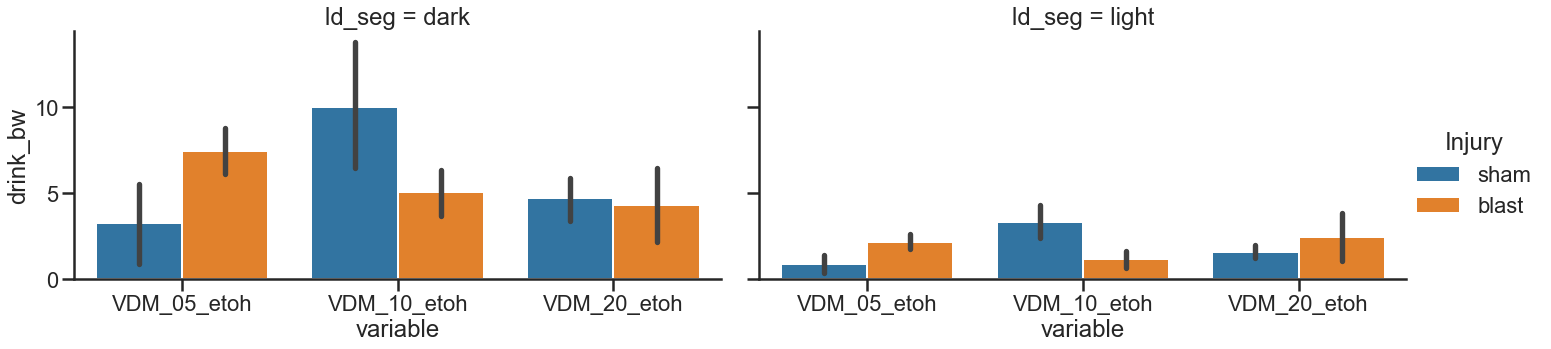

In [167]:
data_int = data_comb_final[(data_comb_final['VDM_RFID_timediff'] < 3) | (data_comb_final['VDM_RFID_timediff'].isna())]
data_int = data_int[data_int['variable'] != 'VDM_H20']
data_int = data_int[data_int['TP'] == '1m']
data_int = data_int[data_int['VDM_day_count'] < 6]

data = data_int.groupby(['ld_seg', 'Animal', 'Injury', 'variable'])['drink_bw'].sum().reset_index()

sns.catplot(x='variable', y='drink_bw', data=data, kind='bar', hue='Injury',
            size=5, ci=68, aspect=2, 
            sharex=True, sharey=True, col='ld_seg')

#### heat map

blast


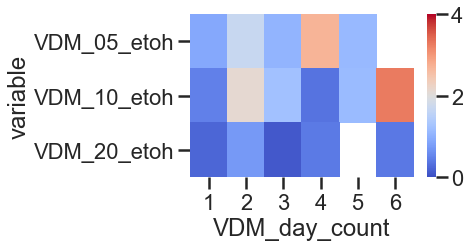

sham


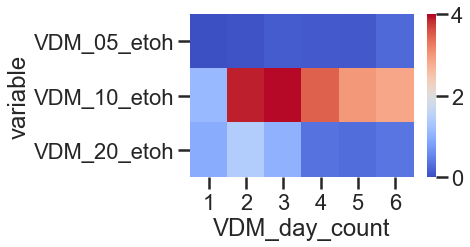

In [68]:
data_int = data_comb_final[data_comb_final['variable'] != 'VDM_H20']
data_int = data_int[data_int['VDM_RFID_timediff'] < 1]
data_int = data_int[data_int['TP'] == '1m']
#data_int = data_int[data_int['VDM_day_count'] < 7]

for variable in data_int['Injury'].unique():
    print(variable)
    #select variable
    data = data_int[(data_int['Injury'] == variable)]
    #compute intake count by cage and hour
    groupby = data.groupby(['Animal', 'variable', 'VDM_day_count'])['drink_bw'].sum().reset_index().groupby(['variable', 'VDM_day_count'])['drink_bw'].mean().reset_index()
    #viz
    groupby = groupby.pivot("variable", "VDM_day_count", "drink_bw")
    plt.figure(figsize=(5,3))
    ax = sns.heatmap(groupby, cmap="coolwarm", vmin=0, vmax=4)
    plt.show()

In [ ]:
data = data_comb_final[data_comb_final['Cage'] == 2]
data = data[data['variable'] != 'VDM_H20']

for variable in data['Injury'].unique():
    print(variable)
    #select variable
    data_int = data[(data['Injury'] == variable)]
    #compute intake count by cage and hour
    groupby = data_int.groupby(['Animal', 'variable', 'day_count'])['drink_bw'].sum().reset_index().groupby(['variable', 'day_count'])['drink_bw'].mean().reset_index()
    #viz
    groupby = groupby.pivot("variable", "day_count", "drink_bw")
    plt.figure(figsize=(5,3))
    ax = sns.heatmap(groupby, cmap="coolwarm", vmin=0, vmax=4)
    plt.show()

#### rasters

In [ ]:
data_comb_final['IdRFID'].value_counts()

In [ ]:
# Set the random seed for data generation

np.random.seed(39)


# Set different colors for each neuron

# Set different colors for each neuron

colorCodes = np.array([[0, 0, 0],

                        [1, 0, 0],

                        [0, 1, 0],

                        [0, 0, 1],

                        [0, .5, 1],

                        [1, 0, 1],

                        [0, 1, 1],

                        [.5, 0, 0]])

                       

# Set spike colors for each neuron

lineSize = [0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.3]                               

param = 'hour_count'

data = data_comb_final

data_1 = data[(data_comb_final['IdRFID'] == '041A55564D')]
data_2 = data[(data_comb_final['IdRFID'] == '041A555768')]

data_V11 = data_1[data_1['variable'] == 'VDM_10_etoh'][param].values
data_V21 = data_1[data_1['variable'] == 'VDM_05_etoh'][param].values
data_V31 = data_1[data_1['variable'] == 'VDM_20_etoh'][param].values
data_V41 = data_1[data_1['variable'] == 'VDM_H20'][param].values

data_V12 = data_2[data_2['variable'] == 'VDM_10_etoh'][param].values
data_V22 = data_2[data_2['variable'] == 'VDM_05_etoh'][param].values
data_V32 = data_2[data_2['variable'] == 'VDM_20_etoh'][param].values
data_V42 = data_2[data_2['variable'] == 'VDM_H20'][param].values

data_array = np.array([data_V11, data_V21, data_V31, data_V41, data_V12, data_V22, data_V32, data_V42])

# Draw a spike raster plot
plt.figure(figsize=(30,10))
plt.eventplot(data_array, color=colorCodes, linelengths = lineSize)  
plt.xlabel('Time')
plt.ylabel('Device')

#plt.xticks(data_array, data_VDM_tidy_intake['datetime'], color='orange', rotation=45, )

plt.show()